In [1]:
import pandas as pd

# Phase A : Prétraitement

# 1- Conversion du fichier CSV en un dataframe
data = pd.read_csv(r"C:\Users\T14s\Desktop\Learning\Formation IA\titanic-passengers.csv", delimiter=';')
df = pd.DataFrame(data)

df.set_index('PassengerId', inplace=True)

# Affichage des 5 premières lignes
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# 2- Comptage du nombre de valeurs NaN pour chaque colonne
print("Nombre de valeurs NaN :")
df.isnull().sum()

Nombre de valeurs NaN :


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
# 3- Nettoyage des données

# Suppression des lignes où 'Embarked' est NaN, car il n'y en a que 2
df = df.dropna(subset=['Embarked'])

# Remplissage des valeurs manquantes avec la moyenne pour 'Age'
df['Age'].fillna(data['Age'].mean(), inplace=True)

# Remplissage des valeurs manquantes dans la colonne 'Cabin' avec la valeur la plus fréquente
valeur_plus_frequente = df['Cabin'].mode()[0]
df['Cabin'].fillna(valeur_plus_frequente, inplace=True)

# Affichage du résultat
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,B96 B98,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,B96 B98,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,B96 B98,S
672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...
10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,B96 B98,C
61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,B96 B98,C
535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,B96 B98,S


In [5]:
# 4- Transformation des données

from sklearn.preprocessing import LabelEncoder

# Tout d'abord, nous déterminons quelles colonnes sont catégorielles
df.info() 

# Nous déterminons les valeurs des colonnes catégorielles (cela nous aidera à choisir le type d'encodage le plus approprié)
print("Survie : ",df['Survived'].unique())
print("Sexe : ",df['Sex'].unique())
print("Cabine : ",df['Cabin'].unique())
print("Embarqué : ",df['Embarked'].unique())

# Étant donné qu'il y a de nombreuses valeurs possibles pour : nom, billet, cabine, et parce qu'ils semblent plus importants, nous allons encoder : sexe, survie

# Encodage Label
df['Survived'] = LabelEncoder().fit_transform(df['Survived'])

# Encodage one-hot
df = pd.get_dummies(df, columns=['Sex'])

# Affichage du résultat
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 343 to 428
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Cabin     889 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.3+ KB
Survie :  ['No' 'Yes']
Sexe :  ['male' 'female']
Cabine :  ['B96 B98' 'F G73' 'B71' 'C82' 'C93' 'B41' 'C95' 'B38' 'C52' 'A32' 'C111'
 'C2' 'E101' 'D17' 'B22' 'B3' 'C45' 'B78' 'A31' 'C128' 'C30' 'A26'
 'C22 C26' 'D15' 'T' 'C54' 'C103' 'C125' 'D20' 'C78' 'E24' 'B82 B84' 'E12'
 'D9' 'D28' 'D19' 'G6' 'D48' 'C90' 'D56' 'E33' '

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
343,0,2,"Collander, Mr. Erik Gustaf",28.000000,0,0,248740,13.0000,B96 B98,S,0,1
76,0,3,"Moen, Mr. Sigurd Hansen",25.000000,0,0,348123,7.6500,F G73,S,0,1
641,0,3,"Jensen, Mr. Hans Peder",20.000000,0,0,350050,7.8542,B96 B98,S,0,1
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.000000,0,4,349909,21.0750,B96 B98,S,1,0
672,0,1,"Davidson, Mr. Thornton",31.000000,1,0,F.C. 12750,52.0000,B71,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,B96 B98,C,1,0
61,0,3,"Sirayanian, Mr. Orsen",22.000000,0,0,2669,7.2292,B96 B98,C,0,1
535,0,3,"Cacic, Miss. Marija",30.000000,0,0,315084,8.6625,B96 B98,S,1,0


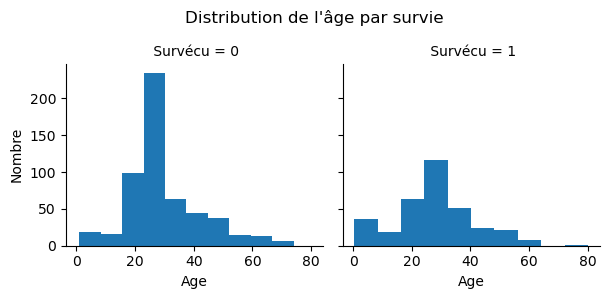

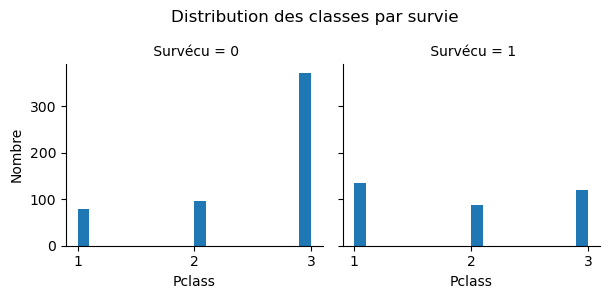

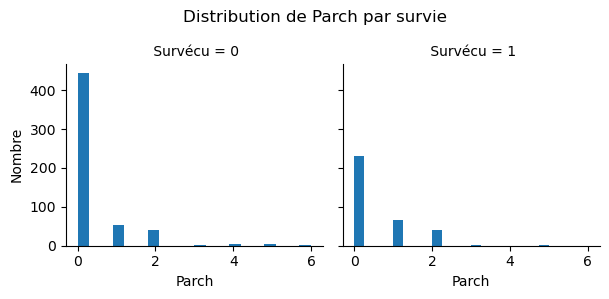

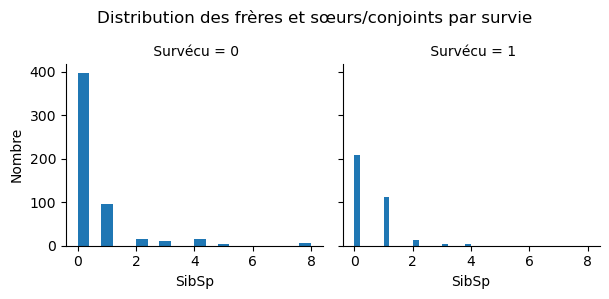

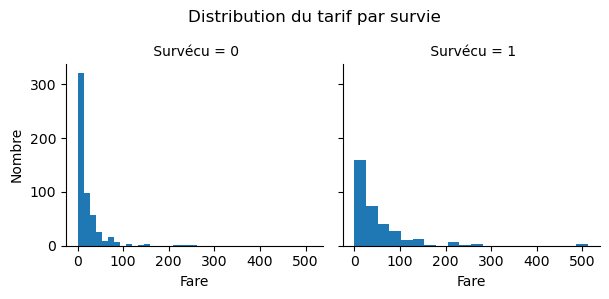

In [6]:
# B. Phase de visualisation :

import matplotlib.pyplot as plt
import seaborn as sns

# Impact de l'âge
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, 'Age', bins=10)
g.set_titles(col_template=" Survécu = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution de l'âge par survie")
plt.subplots_adjust(top=0.8)
plt.show()

# Impact de la classe
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, 'Pclass', bins=20)
g.set_titles(col_template=" Survécu = {col_name}")
plt.xticks([1, 2, 3])
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution des classes par survie")
plt.subplots_adjust(top=0.8)
plt.show()

# Impact de Parch
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, 'Parch', bins=20)
g.set_titles(col_template=" Survécu = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution de Parch par survie")
plt.subplots_adjust(top=0.8)
plt.show()

# Impact de SibSp
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, 'SibSp', bins=20)
g.set_titles(col_template=" Survécu = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution des frères et sœurs/conjoints par survie")
plt.subplots_adjust(top=0.8)
plt.show()

# Impact du tarif (Fare)
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, 'Fare', bins=20)
g.set_titles(col_template=" Survécu = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution du tarif par survie")
plt.subplots_adjust(top=0.8)
plt.show()

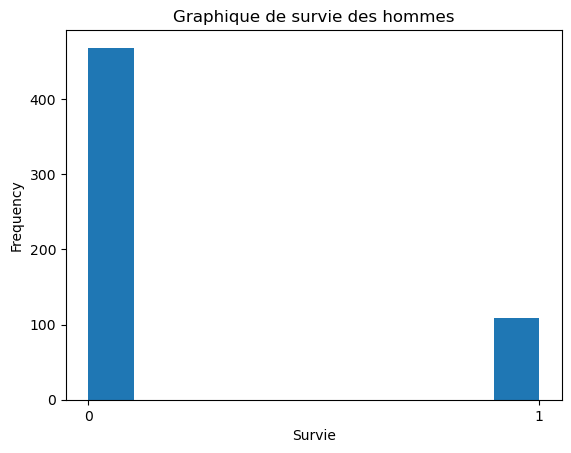

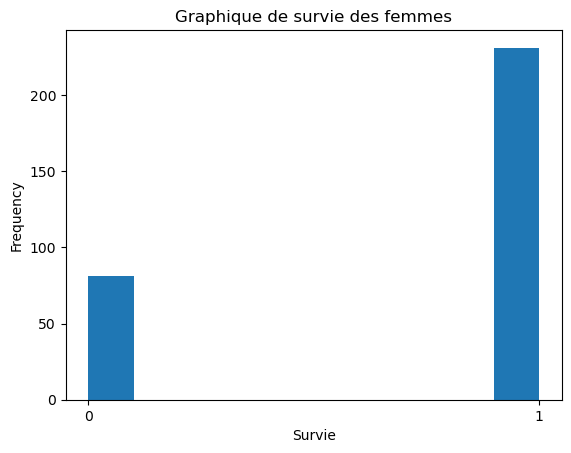

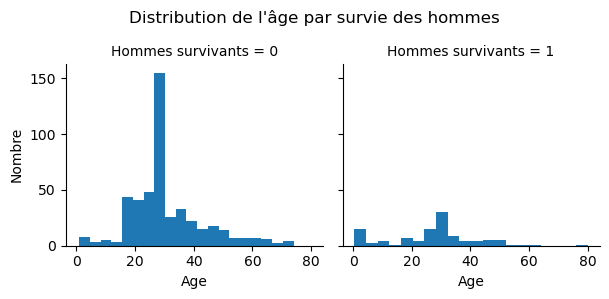

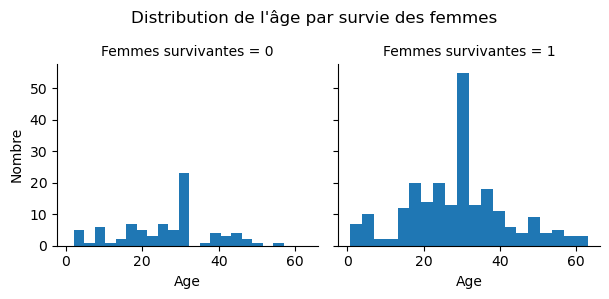

In [7]:
# Impact du sexe
male_df = df[df['Sex_male'] == 1]
female_df = df[df['Sex_female'] == 1]

# Hommes
plt.xlabel('Survie')
plt.title('Graphique de survie des hommes')
plt.xticks([0, 1])
male_df['Survived'].plot.hist()
plt.show()

# Femmes
plt.xlabel('Survie')
plt.title('Graphique de survie des femmes')
plt.xticks([0, 1])
female_df['Survived'].plot.hist()
plt.show()

# Impact du sexe et de l'âge
# Hommes
g = sns.FacetGrid(male_df, col="Survived")
g.map(plt.hist, 'Age', bins=20)
g.set_titles(col_template="Hommes survivants = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution de l'âge par survie des hommes")
plt.subplots_adjust(top=0.8)
plt.show()

# Femmes
g = sns.FacetGrid(female_df, col="Survived")
g.map(plt.hist, 'Age', bins=20)
g.set_titles(col_template="Femmes survivantes = {col_name}")
g.set_ylabels("Nombre")
g.fig.suptitle("Distribution de l'âge par survie des femmes")
plt.subplots_adjust(top=0.8)
plt.show()

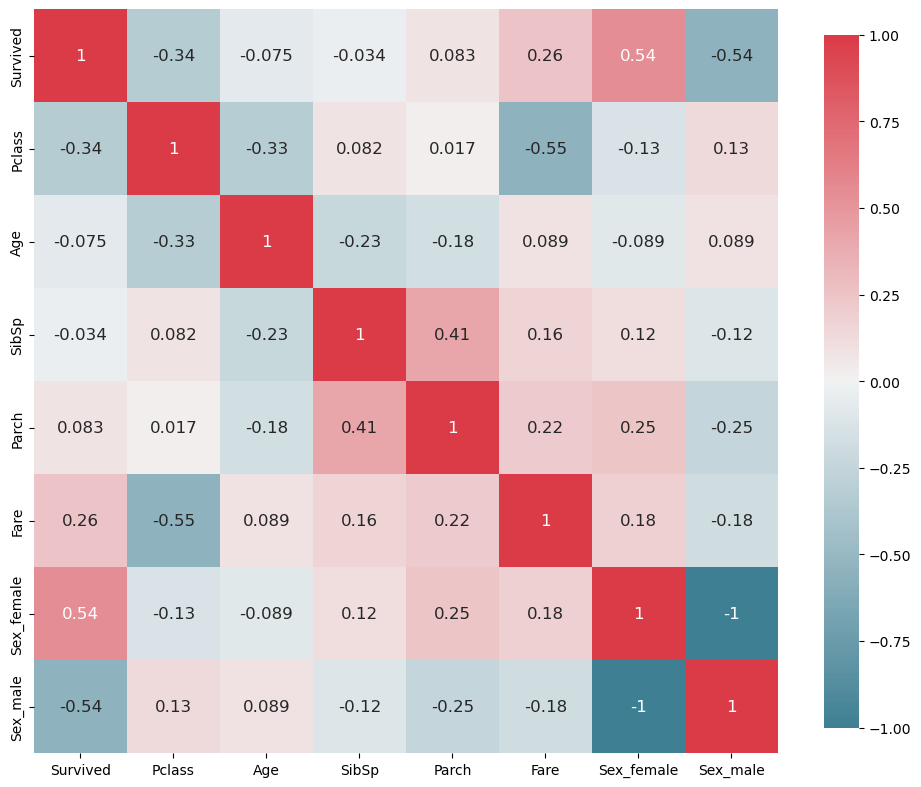

In [8]:
def plot_correlation_map(df):
    # Calculer la matrice de corrélation
    corr = df.corr(numeric_only=True)
    # Créer une figure de sous-graphiques avec une taille spécifique
    s, ax = plt.subplots(figsize=(12, 10))
    # Définir une palette de couleurs pour la carte de chaleur
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Créer une carte de chaleur à l'aide de Seaborn
    s = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,  # Afficher les valeurs de corrélation sur la carte de chaleur
        annot_kws={'fontsize': 12}  # Définir la taille de police pour les annotations
    )

# Utilisation :
plot_correlation_map(df)
plt.show()  # Afficher la carte de chaleur générée

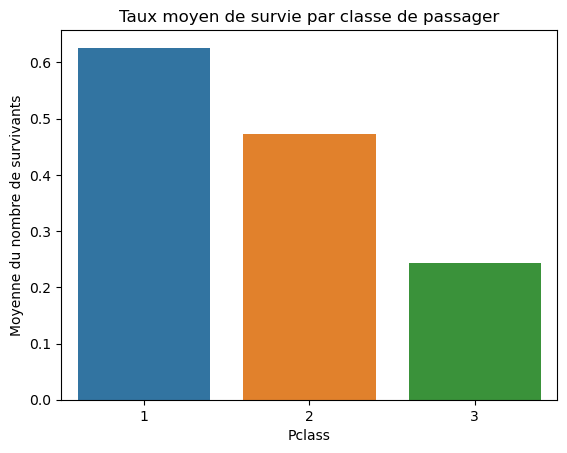

In [9]:
# Utilisation de la fonction groupby combinée à mean() pour examiner la relation entre Pclass (classe des passagers) et Survived (survie)
moyenne_survie_classe = df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()
# Afficher le résultat
sns.barplot(x='Pclass', y='Survived', data=moyenne_survie_classe)
plt.ylabel('Moyenne du nombre de survivants')
plt.title('Taux moyen de survie par classe de passager')
plt.show()

In [10]:
# Créer une nouvelle colonne appelée "Title" (titre) qui contient le titre approprié pour chaque individu

# Dictionnaire des titres en anglais
Title_Dictionary = {
    "Capt": "Officer",  # Officier (Capitaine)
    "Col": "Officer",   # Officier (Colonel)
    "Major": "Officer", # Officier (Major)
    "Dr": "Officer",    # Officier (Docteur)
    "Rev": "Officer",   # Officier (Révérend)
    "Jonkheer": "Royalty",       # Noblesse (Jonkheer)
    "Don": "Royalty",            # Noblesse (Don)
    "Sir": "Royalty",            # Noblesse (Sir)
    "Lady": "Royalty",           # Noblesse (Lady)
    "the Countess": "Royalty",   # Noblesse (la Comtesse)
    "Dona": "Royalty",           # Noblesse (Dona)
    "Mme": "Miss",               # Mademoiselle (Madame)
    "Mlle": "Miss",              # Mademoiselle (Mademoiselle)
    "Miss": "Miss",              # Mademoiselle (Miss)
    "Ms": "Mrs",                 # Madame (Madame)
    "Mrs": "Mrs",                # Madame (Madame)
    "Mr": "Mr",                  # Monsieur (Monsieur)
    "Master": "Master"           # Monsieur (Master, Jeune homme)
}
title=[]
for name in df['Name']:
    for key in Title_Dictionary:
        if key in name:
            title.append(Title_Dictionary[key])
            break
            
df['Title']=title

In [11]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title
PassengerId,,,,,,,,,,,,
343,0,2,28.0,0,0,248740,13.0000,B96 B98,S,0,1,Officer
76,0,3,25.0,0,0,348123,7.6500,F G73,S,0,1,Mr
641,0,3,20.0,0,0,350050,7.8542,B96 B98,S,0,1,Mr
568,0,3,29.0,0,4,349909,21.0750,B96 B98,S,1,0,Mrs
672,0,1,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1,Mr


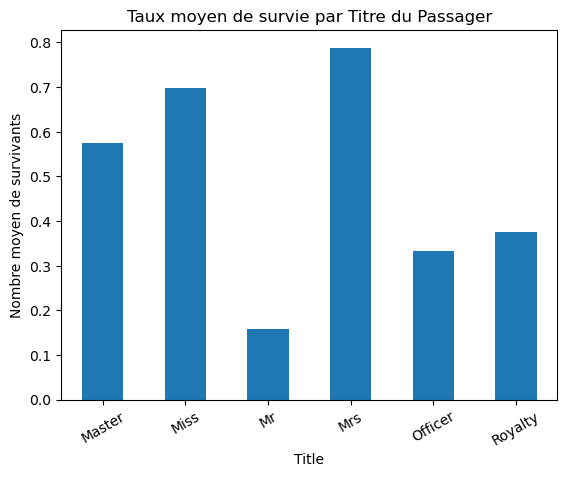

In [12]:
# Corrélation entre le Title (Titre) et le taux de survie (Survived)
moyenne_survie_par_titre = df[['Title', 'Survived']].groupby('Title', as_index=True).mean()
moyenne_survie_par_titre['Survived'].plot.bar(rot=30)
plt.ylabel('Nombre moyen de survivants')
plt.title('Taux moyen de survie par Titre du Passager')
plt.show()

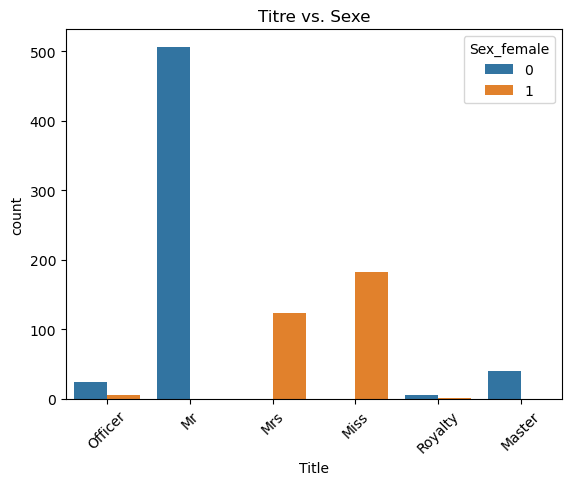

In [13]:
# Visualiser la relation entre le Titre (Title) et le Sexe (Sex)
sns.countplot(data=df, x='Title', hue='Sex_female')
plt.xticks(rotation=45) 
plt.title('Titre vs. Sexe')
plt.show()

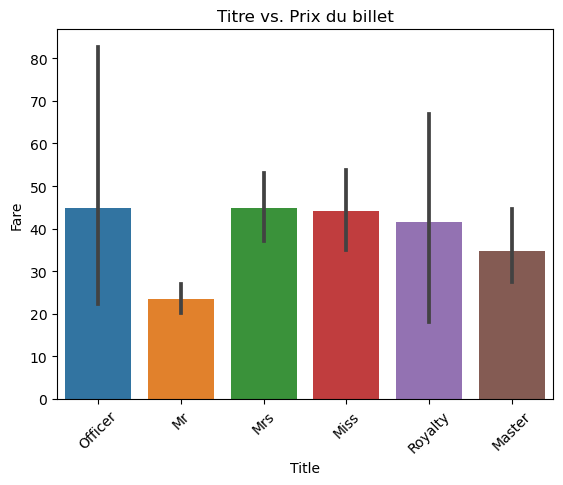

In [14]:
# Corrélation entre le Titre (Title) et le prix du billet (Fare)
sns.barplot(data=df, x='Title', y='Fare')
plt.xticks(rotation=45)
plt.title('Titre vs. Prix du billet')
plt.show()

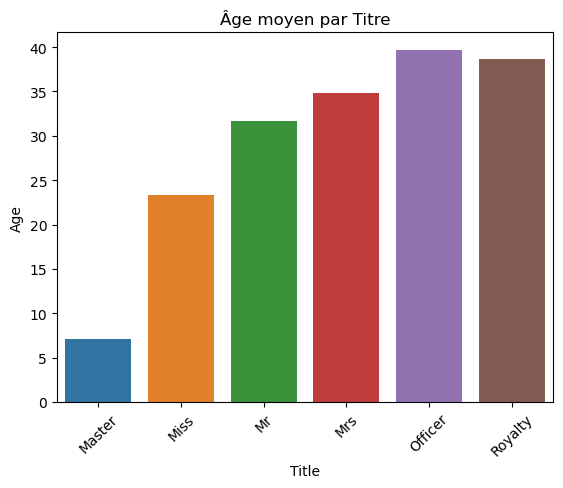

In [15]:
# Calculer la moyenne d'âge (Age) pour chaque Titre (Title)
moyenne_age_par_titre = df.groupby('Title', as_index=False)['Age'].mean()

# Visualiser la moyenne d'âge (Age) pour chaque Titre (Title)
sns.barplot(data=moyenne_age_par_titre, x='Title', y='Age')
plt.xticks(rotation=45)
plt.title('Âge moyen par Titre')
plt.show()

In [16]:
# Utiliser les colonnes Parch et SibSp pour créer une nouvelle caractéristique FamilySize
df['FamilySize'] = df['Parch'] + df['SibSp']
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Title,FamilySize
PassengerId,,,,,,,,,,,,,
343,0,2,28.0,0,0,248740,13.0000,B96 B98,S,0,1,Officer,0
76,0,3,25.0,0,0,348123,7.6500,F G73,S,0,1,Mr,0
641,0,3,20.0,0,0,350050,7.8542,B96 B98,S,0,1,Mr,0
568,0,3,29.0,0,4,349909,21.0750,B96 B98,S,1,0,Mrs,4
672,0,1,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1,Mr,1


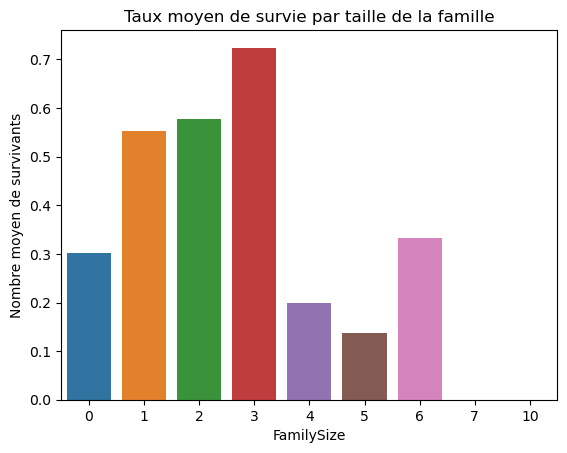

In [17]:
# Corrélation entre la taille de la famille (FamilySize) et le taux de survie (Survived)
FamilySize_survival = df[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean()
sns.barplot(x='FamilySize', y='Survived', data=FamilySize_survival)
plt.ylabel('Nombre moyen de survivants')
plt.title('Taux moyen de survie par taille de la famille')
plt.show()